In [1]:
from utils.database_connection import DatabaseConnection
import utils.results_repository as rep
import pandas as pd
import numpy as np
from utils.column_name_utils import *
import utils.query_utils as query
import matplotlib.pyplot as plot
import utils.dataframe_utils as df_util
import utils.path_utils as path_util
import utils.math_utils as math_util
import math
import utils.latex_utils as tex
from scipy import stats

In [2]:
db = DatabaseConnection()

Connected to MySQL Server version  8.0.32-24


In [3]:
measurements_used = 225
energy_per_time = 1000
generate_graphs = False

In [4]:
# exp_name = "compiler"
exp_name = "measuring_instrument"

In [5]:
used_dut_name = [
    'workstationone'
]

used_dut_name.sort()

used_dut_env = 'prod'

windows = "win32nt"
linux = "unix"

used_os_names = [
    windows, 
    # linux
]

used_test_case_names = [
    'fannkuch-redux.exe',
    'mandelbrot.exe'
]

used_test_case_names.sort()

used_thread = [
    'multi-threaded'
]

used_thread.sort()

used_test_case_name = 'idle-case.exe'

ipg = "ipg"
lhm = "lhm"
rapl = "rapl"
clamp = "clamp"
plug = "plug"
scaphandre = "scaphandre"

windows_mi = [
    ipg, lhm, clamp, plug, scaphandre
]

linux_mi = [
    rapl, clamp, plug
]

used_mi_names = [
    ipg, lhm, ipg, clamp, plug #, scaphandre, # plug, rapl
]

ipg_sample_rate = 100
lhm_sample_rate = 100
rapl_sample_rate = 100
clamp_sample_rate = 100
plug_sample_rate = 200
scaphandre_sample_rate = 100

used_min_temp = 0
used_max_temp = 200
used_burn_in = 1
used_allocated_cores = [
    []
]

used_allocated_cores.sort()

In [6]:
if exp_name == "compiler":
    experiment_name = "same-cpp-multi-core-micro-benchmark-different-compiler"
    experiment_number = 1
    
    used_mi_names = [
        ipg
    ]
    
    used_compilers = [
        'clang', 'intel-one-api', 'min-gw', 'msvc'
    ]
    
    test_case_parameters = ["", "12", "16000"]

if exp_name == "measuring_instrument":
    experiment_name = "same-one-api-compiler-different-measuring-instruments-post-update-and-watt"
    experiment_number = 2
    
    used_mi_names = [
        ipg, lhm, ipg, clamp, plug, scaphandre #, scaphandre, # plug, rapl
    ]
    
    used_compilers = [
        'intel-one-api'
    ]
    
    test_case_parameters = ["", "12", "64000"]


used_mi_names.sort()
used_compilers.sort()

### DUTs

In [7]:
used_dut_name_str = "','".join(used_dut_name)
used_os_name_str = "','".join(used_os_names)

In [8]:
dut = rep.get_devices_under_test(db)

dut

,Id,Name,Os,Env
0,1,workstationone,win32nt,prod
1,2,workstationone,unix,prod
2,3,workstationone,unix,dev
3,4,workstationone,win32nt,dev


In [9]:
used_dut = dut.query(f"{ENV} == '{used_dut_env}' and {NAME} in ('{used_dut_name_str}') and Os in ('{used_os_name_str}')")

used_dut

,Id,Name,Os,Env
0,1,workstationone,win32nt,prod


### Test Cases

In [10]:
tc = rep.get_test_cases(db)

tc

,Id,Name,Compiler,Language,Optimizations,TestCaseSize,Parameter,Threads
0,1,fannkuch-redux.exe,clang,c++,-openmp,microbenchmarks,12,multi-threaded
1,2,mandelbrot.exe,clang,c++,-openmp,microbenchmarks,16000,multi-threaded
2,3,idle-case.exe,clang,c++,-openmp,microbenchmarks,,multi-threaded
3,4,fannkuch-redux.exe,intel-one-api,c++,-openmp,microbenchmarks,12,multi-threaded
4,5,mandelbrot.exe,intel-one-api,c++,-openmp,microbenchmarks,16000,multi-threaded
5,6,idle-case.exe,intel-one-api,c++,-openmp,microbenchmarks,,multi-threaded
6,7,fannkuch-redux.exe,min-gw,c++,-openmp,microbenchmarks,12,multi-threaded
7,8,mandelbrot.exe,min-gw,c++,-openmp,microbenchmarks,16000,multi-threaded
8,9,idle-case.exe,min-gw,c++,-openmp,microbenchmarks,,multi-threaded
9,10,fannkuch-redux.exe,msvc,c++,-openmp,microbenchmarks,12,multi-threaded


In [11]:
used_test_case_name_str = "','".join(used_test_case_names)
used_compiler_str = "','".join(used_compilers)
used_thread_str = "','".join(used_thread)
used_test_case_parameters = "','".join(test_case_parameters)

used_tc = tc.query(f"{COMPILER} in ('{used_compiler_str}') and {NAME} in ('{used_test_case_name_str}') and {THREADS} in ('{used_thread_str}') and Parameter in ('{used_test_case_parameters}')")

In [12]:
used_idle_case = tc.query(f"{COMPILER} in ('{used_compiler_str}') and {NAME} == '{used_test_case_name}' and {THREADS} in ('{used_thread_str}')")

### Measuring Instruments

In [13]:
mi = rep.get_measuring_instruments(db)

mi

,Id,Name,SampleRate
0,1,ipg,100
1,2,lhm,100
2,3,clamp,100
3,4,rapl,100
4,5,clamp,500
5,6,scaphandre,100
6,7,plug,100
7,8,plug,200


In [14]:
used_mi_query_list = []

if ipg in used_mi_names:
    used_mi_query_list.append(f"({NAME} == '{ipg}' and {SAMPLE_RATE} == {ipg_sample_rate})")

if lhm in used_mi_names:
    used_mi_query_list.append(f"({NAME} == '{lhm}' and {SAMPLE_RATE} == {lhm_sample_rate})")

if rapl in used_mi_names:
    used_mi_query_list.append(f"({NAME} == '{rapl}' and {SAMPLE_RATE} == {rapl_sample_rate})")


if plug in used_mi_names:
    used_mi_query_list.append(f"({NAME} == '{plug}' and {SAMPLE_RATE} == {plug_sample_rate})")

if clamp in used_mi_names:
    used_mi_query_list.append(f"({NAME} == '{clamp}' and {SAMPLE_RATE} == {clamp_sample_rate})")
    
if scaphandre in used_mi_names:
    used_mi_query_list.append(f"({NAME} == '{scaphandre}' and {SAMPLE_RATE} == {scaphandre_sample_rate})")

used_mi = mi.query(" or ".join(used_mi_query_list))

### Configurations

In [15]:
used_allocated_cores_str = "','".join([str(x) for x in used_allocated_cores])

In [16]:
config = rep.get_configurations(db)

config

,Id,MinTemp,MaxTemp,Burnin,AllocatedCores
0,1,0,200,1,[]
1,2,0,200,0,[1]
2,3,0,200,0,"[0, 1, 2, 3]"
3,4,0,200,0,"[0, 1, 2, 3, 4, 5, 6, 7]"


In [17]:
used_configs = config.query(f"{MIN_TEMP} == {used_min_temp} and " +
                            f"{MAX_TEMP} == {used_max_temp} and " +
                            f"{BURN_IN} == {used_burn_in} and " +
                            f"{ALLOCATED_CORES} in ('{used_allocated_cores_str}')")

### Experiment Names

In [18]:
exp = rep.get_distinct_experiments(db)

exp

,Experiment,Name
0,1,same-cpp-multi-core-micro-benchmark-different-...
1,1,test
2,1,same-one-api-compiler-different-measuring-inst...
3,1,same-one-api-compiler-different-measuring-inst...
4,2,same-one-api-compiler-different-measuring-inst...


## Used Things

In [19]:
used_dut

,Id,Name,Os,Env
0,1,workstationone,win32nt,prod


In [20]:
used_tc

,Id,Name,Compiler,Language,Optimizations,TestCaseSize,Parameter,Threads
3,4,fannkuch-redux.exe,intel-one-api,c++,-openmp,microbenchmarks,12,multi-threaded
18,22,mandelbrot.exe,intel-one-api,c++,-openmp,microbenchmarks,64000,multi-threaded


In [21]:
used_mi

,Id,Name,SampleRate
0,1,ipg,100
1,2,lhm,100
2,3,clamp,100
5,6,scaphandre,100
7,8,plug,200


In [22]:
used_idle_case

,Id,Name,Compiler,Language,Optimizations,TestCaseSize,Parameter,Threads
5,6,idle-case.exe,intel-one-api,c++,-openmp,microbenchmarks,,multi-threaded


In [23]:
used_configs

,Id,MinTemp,MaxTemp,Burnin,AllocatedCores
0,1,0,200,1,[]


In [24]:
cpu_energy_results = {}
dram_energy_results = {}
gpu_energy_results = {}
duration_results = {}

idle_cpu_consumption_results = {}

cpu_dynamic_energy_consumption = {}
gpu_dynamic_energy_consumption = {}
dram_dynamic_energy_consumption = {}

for dut_index, dut_row in used_dut.iterrows():
    dut_id = dut_row[ID]
    dut_name = dut_row[NAME]
    dut_os = dut_row[OS]
    for mi_index, mi_row in used_mi.iterrows():
        mi_id = mi_row[ID]
        mi_name = mi_row[NAME]
        
        if dut_os == windows and not mi_name in windows_mi:
            continue
        
        if dut_os == linux and not mi_name in linux_mi:
            continue
        
        for config_index, config_row in used_configs.iterrows():
            config_id = config_row[ID]
            config_cores = config_row[ALLOCATED_CORES]
            if config_cores == "[]":
                config_cores = 'all'
            for tc_index, tc_row in used_tc.iterrows():
                tc_id = tc_row[ID]
                tc_name = tc_row[NAME]
                tc_compiler = tc_row[COMPILER]
                tc_language = tc_row[LANGUAGE]
                tc_optimizations = tc_row[OPTIMIZATIONS]
                tc_test_case_size = tc_row[TEST_CASE_SIZE]
                tc_threads = tc_row[THREADS]
                
                if dut_os == linux and tc_compiler == "msvc":
                    continue
                
                tc_idle_case = query.get_idle_case(used_idle_case, tc_compiler, tc_language, tc_optimizations, tc_test_case_size, tc_threads)
                tc_idle_case_id =int(tc_idle_case[ID].iloc[0])
                
                key = f"{tc_name}.{mi_name}.{dut_name}.{config_cores}.{tc_compiler}.{dut_os}"
                tc_collection = rep.get_collections(db, dut_id, mi_id, config_id, tc_id, experiment_name, experiment_number)
                tc_idle_case_collection = rep.get_collections(db, dut_id, mi_id, config_id, tc_idle_case_id, experiment_name, experiment_number)
                
                if tc_collection.shape[0] == 0:
                    print(f"N - {key}.{mi_row['SampleRate']}.{tc_id}")
                    continue
                else:
                    print(f"Y - {key}.{mi_row['SampleRate']}.{tc_id}")
                
                tc_collection_id = int(tc_collection[ID].iloc[0])
                tc_idle_case_collection_id = int(tc_idle_case_collection[ID].iloc[0])
                
                tc_measurements = rep.get_measurements(db, tc_collection_id)
                tc_idle_case_measurements = rep.get_measurements(db, tc_idle_case_collection_id)
                
                dram_energy_results[key] = list(tc_measurements["DramEnergyInJoules"])
                cpu_energy_results[key] = list(tc_measurements["CpuEnergyInJoules"])
                gpu_energy_results[key] = list(tc_measurements["GpuEnergyInJoules"])
                duration_results[key] = list(tc_measurements["Duration"])
                
                idle_cpu_consumption = df_util.get_cpu_energy_per_time(tc_idle_case_measurements, energy_per_time)
                idle_gpu_consumption = df_util.get_gpu_energy_per_time(tc_idle_case_measurements, energy_per_time)
                idle_dram_consumption = df_util.get_dram_energy_per_time(tc_idle_case_measurements, energy_per_time)
                
                idle_cpu_consumption_results[key] = tc_idle_case_measurements["CpuEnergyInJoules"]
                
                cpu_dynamic_energy_consumption[key] = df_util.get_cpu_dynamic_energy(tc_measurements, idle_cpu_consumption, energy_per_time)
                gpu_dynamic_energy_consumption[key] = df_util.get_gpu_dynamic_energy(tc_measurements, idle_gpu_consumption, energy_per_time)
                dram_dynamic_energy_consumption[key] = df_util.get_dram_dynamic_energy(tc_measurements, idle_dram_consumption, energy_per_time)

Y - fannkuch-redux.exe.ipg.workstationone.all.intel-one-api.win32nt.100.4
Y - mandelbrot.exe.ipg.workstationone.all.intel-one-api.win32nt.100.22
Y - fannkuch-redux.exe.lhm.workstationone.all.intel-one-api.win32nt.100.4
Y - mandelbrot.exe.lhm.workstationone.all.intel-one-api.win32nt.100.22
Y - fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt.100.4
Y - mandelbrot.exe.clamp.workstationone.all.intel-one-api.win32nt.100.22
Y - fannkuch-redux.exe.scaphandre.workstationone.all.intel-one-api.win32nt.100.4
Y - mandelbrot.exe.scaphandre.workstationone.all.intel-one-api.win32nt.100.22
Y - fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt.200.4
Y - mandelbrot.exe.plug.workstationone.all.intel-one-api.win32nt.200.22


In [25]:
rep.get_collections(db, dut_id, mi_id, config_id, tc_id, experiment_name, experiment_number)

,Id,Name,ConfigurationId,TestCaseId,DutId,MeasuringInstrumentId,AdditionalMetadata,CollectionNumber
0,116,same-one-api-compiler-different-measuring-inst...,1,22,1,8,{},2


In [26]:
config_cores == "[]"

False

In [27]:
for key, value in dram_energy_results.items():
    dram_energy_results[key] = value[:measurements_used]
    
for key, value in cpu_energy_results.items():
    cpu_energy_results[key] = value[:measurements_used]

for key, value in gpu_energy_results.items():
    gpu_energy_results[key] = value[:measurements_used]

for key, value in duration_results.items():
    duration_results[key] = value[:measurements_used]
    
for key, value in cpu_dynamic_energy_consumption.items():
    cpu_dynamic_energy_consumption[key] = value[:measurements_used]

for key, value in gpu_dynamic_energy_consumption.items():
    gpu_dynamic_energy_consumption[key] = value[:measurements_used]
    
for key, value in dram_dynamic_energy_consumption.items():
    dram_dynamic_energy_consumption[key] = value[:measurements_used]
    
for key, value in idle_cpu_consumption_results.items():
    idle_cpu_consumption_results[key] = value[:measurements_used]

In [29]:
## Energy consumption for the entire test case
dram_df = pd.DataFrame(dram_energy_results)
dram_df =dram_df.reindex(columns=sorted(dram_df.columns))

cpu_df = pd.DataFrame(cpu_energy_results)
cpu_df = cpu_df.reindex(columns=sorted(cpu_df.columns))

gpu_df = pd.DataFrame(gpu_energy_results)
gpu_df = gpu_df.reindex(columns=sorted(gpu_df.columns))

duration_df = pd.DataFrame(duration_results)
duration_df = duration_df.reindex(columns=sorted(duration_df.columns))

## Dynamic energy data frames
dram_dynamic_df = pd.DataFrame(dram_dynamic_energy_consumption)
dram_dynamic_df = dram_dynamic_df.reindex(columns=sorted(duration_df.columns))

cpu_dynamic_df = pd.DataFrame(cpu_dynamic_energy_consumption)
cpu_dynamic_df = cpu_dynamic_df.reindex(columns=sorted(cpu_dynamic_df.columns))

gpu_dynamic_df = pd.DataFrame(gpu_dynamic_energy_consumption)
gpu_dynamic_df = gpu_dynamic_df.reindex(columns=sorted(gpu_dynamic_df.columns))

idle_cpu_df = pd.DataFrame(idle_cpu_consumption_results)
idle_cpu_df = idle_cpu_df.reindex(columns=sorted(idle_cpu_df.columns))



In [30]:
"clamp:" + str(list(idle_cpu_df["fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt"]))

'clamp:[1008.0726506090244, 1015.1899541480461, 1007.2560378876981, 1004.5043802172968, 1003.6550280272183, 1003.5018056163062, 995.4300472603628, 1001.3731483919663, 993.8112222553169, 985.4666466385129, 1008.9529328514635, 998.2803810688779, 994.1075862071397, 996.3097360178165, 1002.9397635413629, 1008.4119833527618, 1023.5514662788898, 1009.4190508845055, 1018.8706510704682, 1014.4785644934764, 1023.6598102024284, 1008.7375844997059, 1016.4010132559822, 1003.2334476874761, 1010.1237459864587, 1012.9565356448032, 1004.7978973366282, 1007.8551057714133, 1004.0750965657588, 992.0602708372687, 1001.4717019511827, 999.8349971101034, 993.6555156736772, 1004.965914262906, 1009.543659625013, 1008.9667142255136, 1001.6797328632974, 1002.790802454938, 995.4228025404711, 991.5731244664107, 986.7626614814695, 988.4863814411852, 990.4482261875505, 992.171367307066, 1000.4549895953421, 993.1899593721661, 999.1271621842761, 996.5661454374506, 987.9436283134498, 992.3212844360435, 976.988539544952

In [31]:
"plug: " + str(list(idle_cpu_df["fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt"]))

'plug: [838.9411034482795, 810.0925597269614, 810.5563682432412, 810.46088590604, 809.9600267558559, 811.0167050847467, 809.1062742474949, 810.5088918918881, 813.510888135592, 814.1133000000018, 807.9818321917845, 808.2260540540506, 808.2229560810787, 808.310258503405, 807.705203389832, 813.510888135594, 807.8171452702687, 808.0422013422819, 808.6318918918885, 805.3638813559342, 807.3551065292083, 808.1360958904148, 807.6860738255017, 816.0891621621588, 806.1490784982946, 808.3445369127519, 806.8328590604029, 806.5934589041127, 807.8915494880546, 805.7366723549479, 806.8290884353777, 806.2446283783764, 806.6313020134231, 808.0982608695664, 807.850755852846, 805.3715704697992, 806.7409627118644, 807.6242465753432, 807.0454982817854, 811.0689965870317, 805.8721812080529, 805.6564309764269, 806.4864542372877, 804.4337671232907, 804.6814285714286, 805.1217235494872, 805.4690939597311, 805.3157152542366, 805.8240276816623, 806.4951849315065, 805.8928327645056, 805.3101369863011, 805.9774372

In [32]:
idle_cpu_df

,fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.ipg.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.lhm.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.scaphandre.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.clamp.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.ipg.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.lhm.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.plug.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.scaphandre.workstationone.all.intel-one-api.win32nt
0,1008.072651,130.174622,129.061374,838.941103,141.571608,1008.072651,130.174622,129.061374,838.941103,141.571608
1,1015.189954,131.309937,132.414347,810.092560,130.782818,1015.189954,131.309937,132.414347,810.092560,130.782818
2,1007.256038,131.524170,131.853936,810.556368,130.415959,1007.256038,131.524170,131.853936,810.556368,130.415959
3,1004.504380,130.186401,129.036512,810.460886,130.534234,1004.504380,130.186401,129.036512,810.460886,130.534234
4,1003.655028,129.810852,130.712135,809.960027,131.654210,1003.655028,129.810852,130.712135,809.960027,131.654210
...,...,...,...,...,...,...,...,...,...,...
220,959.083183,131.948547,131.042092,802.283429,131.127201,959.083183,131.948547,131.042092,802.283429,131.127201
221,953.981726,129.960510,134.496040,801.976980,131.569737,953.981726,129.960510,134.496040,801.976980,131.569737
222,964.692007,130.414551,129.677017,802.283429,130.509161,964.692007,130.414551,129.677017,802.283429,130.509161
223,952.187513,131.314819,133.163145,799.765068,131.520587,952.187513,131.314819,133.163145,799.765068,131.520587


In [33]:
cpu_clamp_total_list = cpu_df["fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt"]
cpu_plug_total_list = cpu_df["fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt"]

plug_idle_list = list(idle_cpu_df["fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt"])
clamp_idle_list = list(idle_cpu_df["fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt"])

cpu_clamp_total = sum(list(cpu_clamp_total_list)) / len(list(cpu_clamp_total_list))
cpu_plug_total = sum(list(cpu_plug_total_list)) / len(list(cpu_plug_total_list))
cpu_plug_dynamic = sum(list(plug_idle_list)) / len(list(plug_idle_list))
cpu_clamp_dynamic = sum(list(clamp_idle_list)) / len(list(clamp_idle_list))

print(f"idle:")
print(f"clamp: {cpu_clamp_dynamic}, plug: {cpu_plug_dynamic}")
print(f"total:")
print(f"clamp: {cpu_clamp_total}, plug: {cpu_plug_total}")

idle:
clamp: 979.7085259328801, plug: 804.072384796293
total:
clamp: 1542.120851877883, plug: 1589.5014132561373


In [34]:
for column in duration_df.columns:
    duration_df[column] = duration_df[column] / 1000

Combined DRAM Energy Consumption in Joules


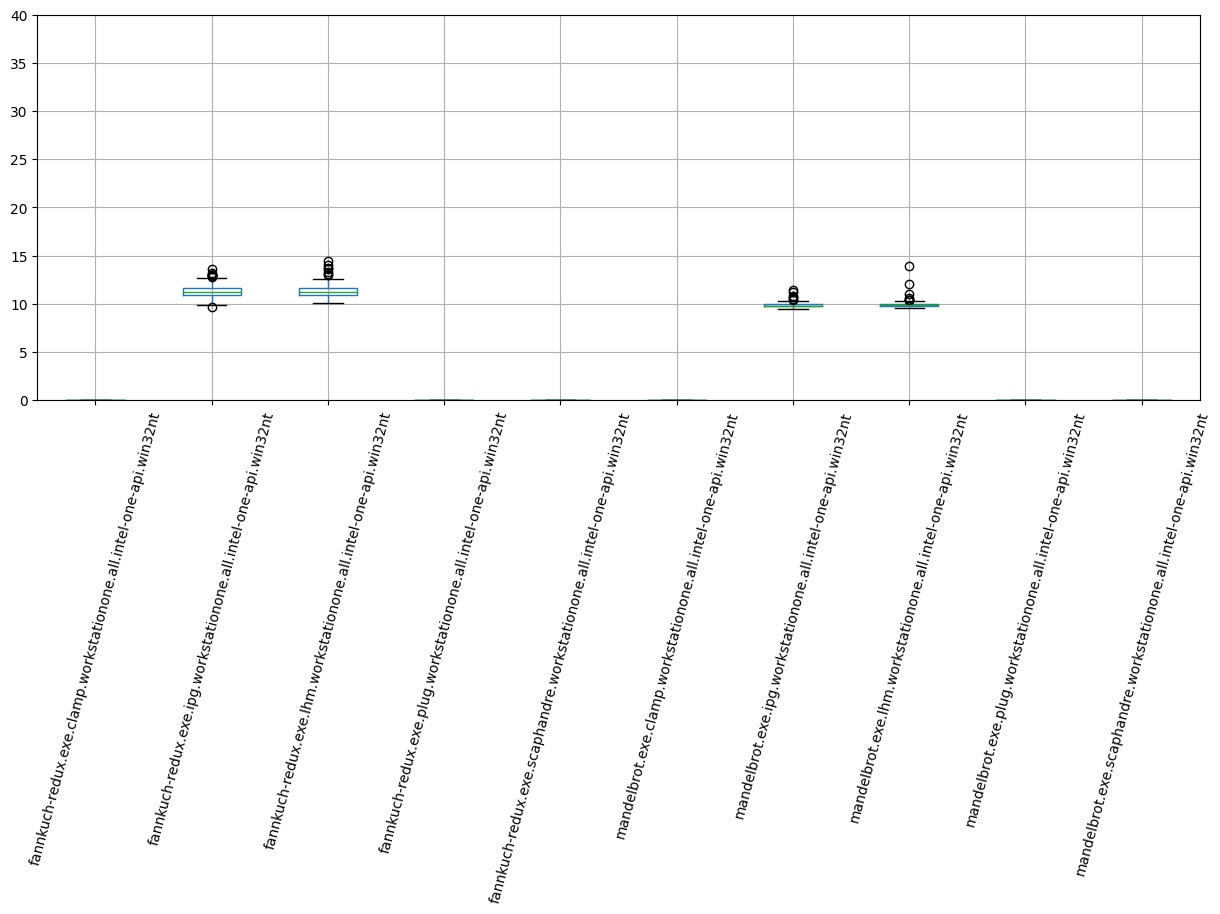

Combined CPU Energy Consumption in Joules


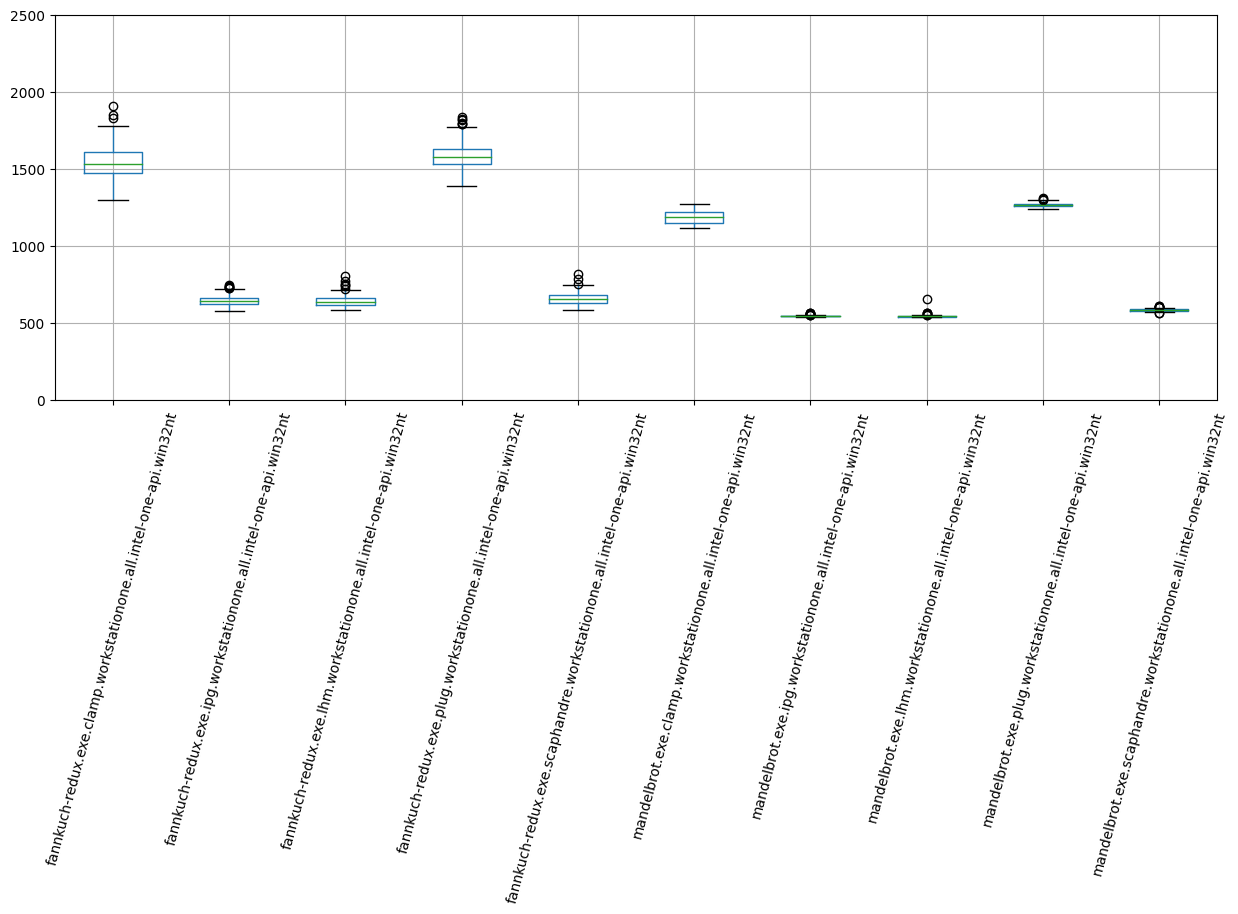

Combined GPU Energy Consumption in Joules


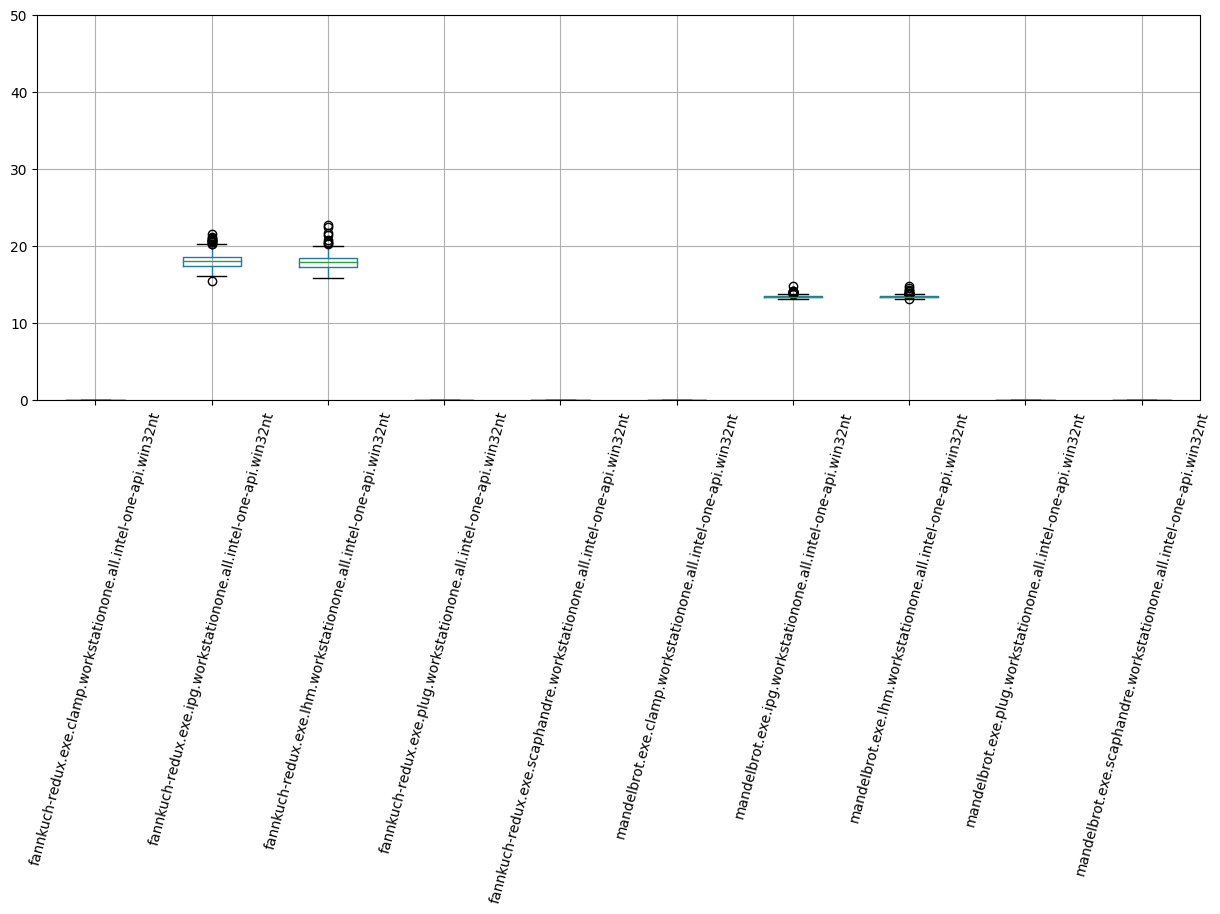

Duration of Test Case


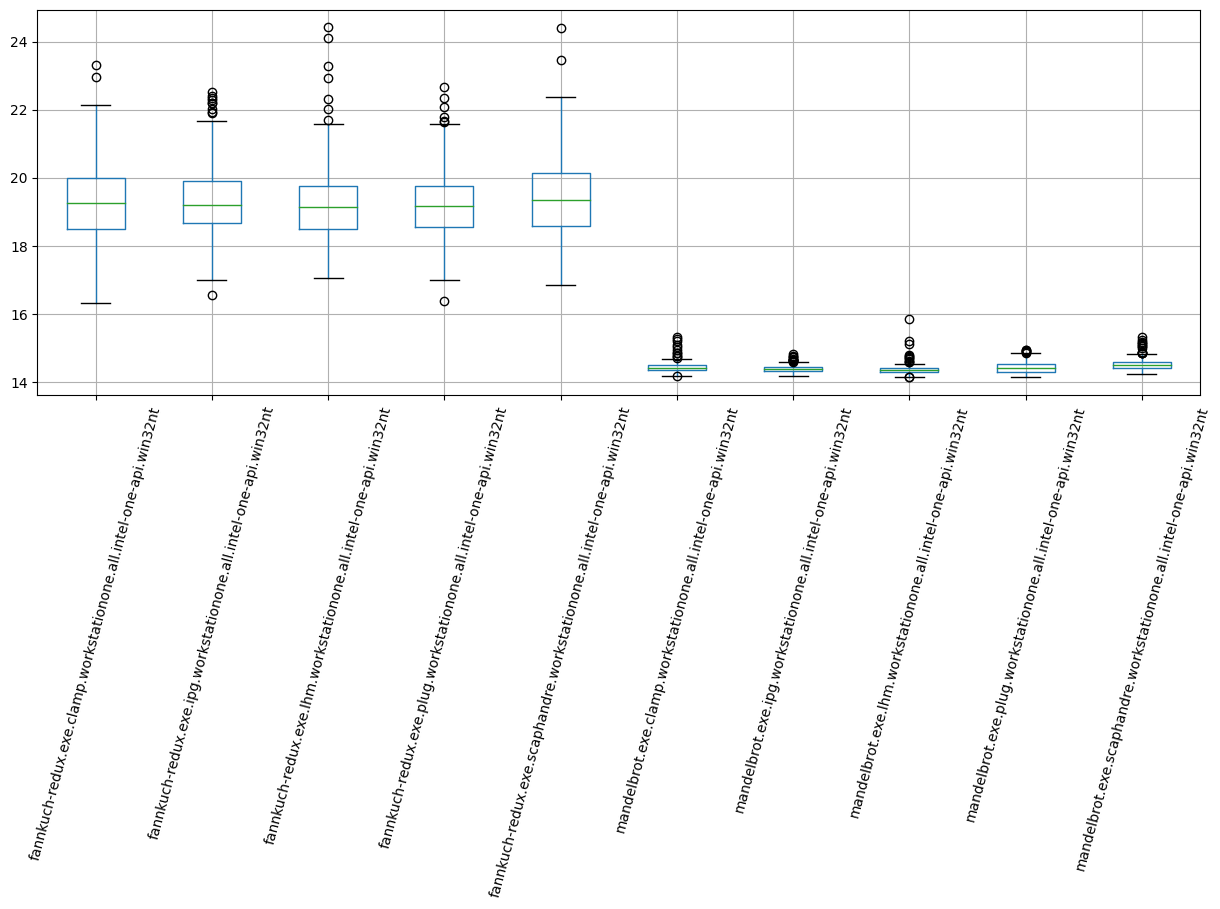

In [35]:
print("Combined DRAM Energy Consumption in Joules")
dram_boxplot = dram_df.boxplot(figsize=(15,5), rot=75)
dram_boxplot.plot()
plot.ylim(0, 40)
plot.show()

print("Combined CPU Energy Consumption in Joules")
cpu_boxplot = cpu_df.boxplot(figsize=(15,5), rot=75)
cpu_boxplot.plot()
cpu_boxplot
plot.ylim(0,2500)
plot.show()

print("Combined GPU Energy Consumption in Joules")
gpu_boxplot = gpu_df.boxplot(figsize=(15,5), rot=75)
gpu_boxplot.plot()
plot.ylim(0,50)
plot.show()

print("Duration of Test Case")
duration_boxplot = duration_df.boxplot(figsize=(15,5), rot=75)
duration_boxplot.plot()
# plot.ylim(0,40)
plot.show()

Dynamic CPU Energy Consumption in Watts


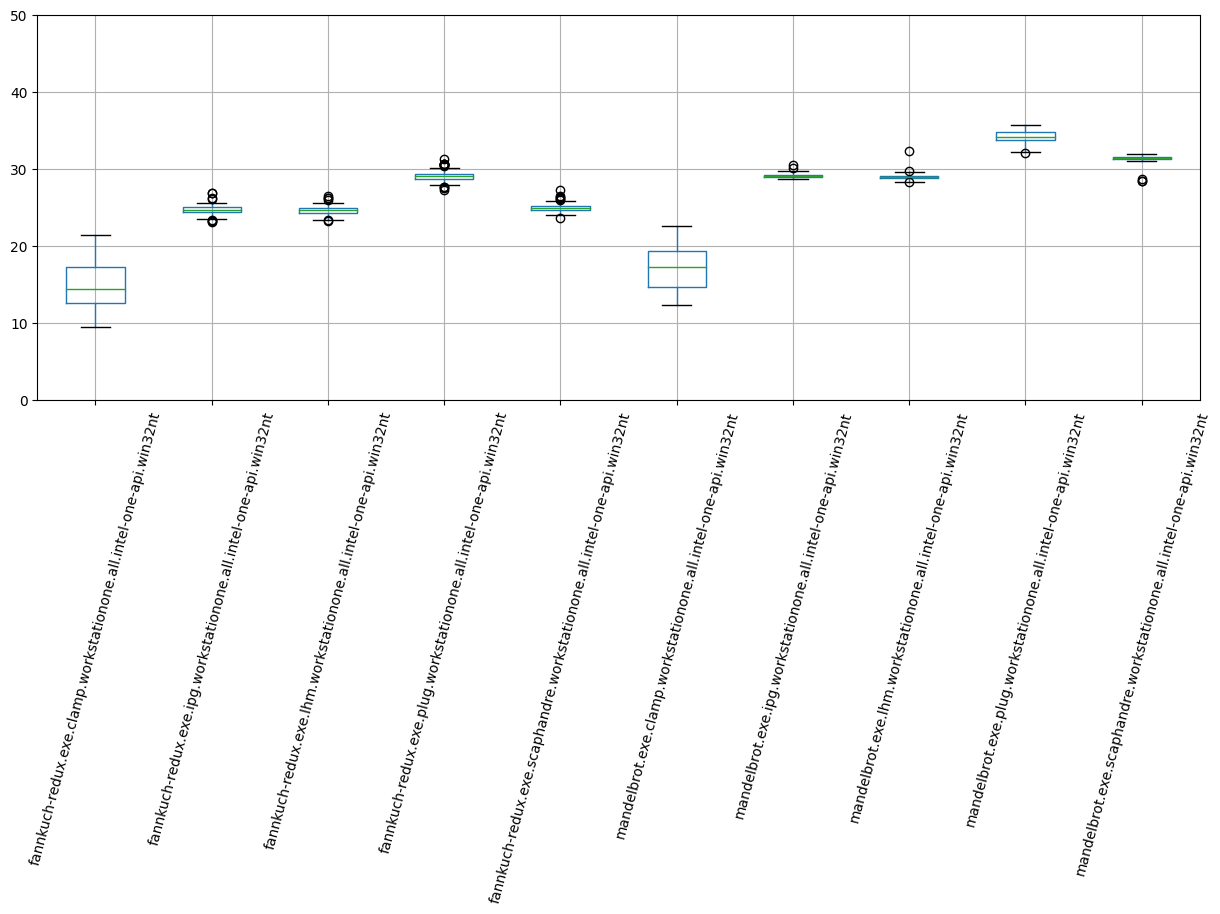

In [36]:
# print("Dynamic DRAM Energy Consumption in Watts")
# dynamic_dram_boxplot = dram_dynamic_df.boxplot(figsize=(15,5), rot=75)
# dynamic_dram_boxplot.plot()
# plot.ylim(-0.1, 0.25)
# plot.show()

print("Dynamic CPU Energy Consumption in Watts")
dynamic_cpu_boxplot = cpu_dynamic_df.boxplot(figsize=(15,5), rot=75)
dynamic_cpu_boxplot.plot()
plot.ylim(0,50)
plot.show()

# print("Dynamic GPU Energy Consumption in Watts")
# dynamic_gpu_boxplot = gpu_dynamic_df.boxplot(figsize=(15,5), rot=75)
# dynamic_gpu_boxplot.plot()
# plot.ylim(-0.1, 0.25)
# plot.show()


In [37]:
cpu_dynamic_df

,fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.ipg.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.lhm.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.scaphandre.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.clamp.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.ipg.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.lhm.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.plug.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.scaphandre.workstationone.all.intel-one-api.win32nt
0,14.398439,25.318091,25.596784,31.307408,25.251218,22.144633,29.585700,29.348210,35.581548,31.889774
1,20.997980,24.895186,24.862711,30.477056,25.587361,18.420062,29.573358,29.509653,34.622741,31.405641
2,18.983049,24.608783,25.157555,30.099915,25.504990,22.558908,29.406433,29.395747,35.228411,31.546237
3,15.075148,24.606780,25.016001,30.601650,25.163173,22.385164,29.535990,29.188966,34.000813,31.504796
4,16.487427,25.016682,25.071619,30.692323,25.201812,15.237300,30.494383,29.428790,35.699268,31.550677
...,...,...,...,...,...,...,...,...,...,...
220,9.511413,24.820315,24.432964,28.967106,24.930842,13.758616,29.007028,28.908051,32.450928,31.208703
221,11.842657,24.760068,24.069111,28.132689,25.043954,13.772778,28.859892,28.410815,33.422242,31.222830
222,15.173806,24.781027,24.090194,28.501773,24.817542,13.239965,28.799472,28.806470,32.959824,31.448311
223,12.219605,24.168935,24.362368,28.711680,24.446585,12.384285,29.185051,28.726730,32.204210,31.278741


In [38]:
def list_to_label(lst):
    if len(lst) == 1:
        return lst[0]
    elif len(lst) == 2:
        return f"{lst[0]} and {lst[1]}"
    else:
        return ", ".join(lst[:-1]) + f" and {lst[-1]}"

def get_caption(data_type, name, c_measuring_instrument, c_duts, c_test_cases, c_compiler):
    caption = f"{name} measurements"

    if not ',' in c_measuring_instrument:
        caption += f" by {c_measuring_instrument}"

    if not ',' in c_duts:
        caption += f" on {c_duts}"
        
    if not ',' in c_test_cases:
        caption += f" for test case(s) {c_test_cases}"
        
    if not ',' in c_compiler:
        caption += f" compiled on {c_compiler}"

    return caption

In [39]:
box_plot_raw_data = [
    {
        "data" : cpu_dynamic_df,
        "name" : "cpu",
        "data_type" : "dynamic energy consumption",
        "width" : 0.4,
        "xmin" : 0,
        "xmax" : 40,
        "xlabel" : "Average Energy Consumption (Watt)"
    },
    {
        "data" : cpu_df,
        "name" : "cpu",
        "data_type" : "energy consumption",
        "width" : 0.9,
        "xmin" : 0,
        "xmax" : 2000,
        "xlabel" : "Total Energy Consumption (Joules)"
    },
    {
        "data" : dram_dynamic_df,
        "name" : "dram",
        "data_type" : "dynamic energy consumption",
        "width" : 0.9,
        "xmin" : -0.1,
        "xmax" : 0.1,
        "xlabel" : "Average Energy Consumption (Watt)"
    },
    {
        "data" : dram_df,
        "name" : "dram",
        "data_type" : "energy consumption",
        "width" : 0.9,
        "xmin" : 0,
        "xmax" : 40,
        "xlabel" : "Total Energy Consumption (Joules)"
    },
    {
        "data" : gpu_dynamic_df,
        "name" : "gpu",
        "data_type" : "dynamic energy consumption",
        "width" : 0.9,
        "xmin" : -0.1,
        "xmax" : 0.1,
        "xlabel" : "Average Energy Consumption (Watt)"
    },
    {
        "data" : gpu_df,
        "name" : "gpu",
        "data_type" : "energy consumption",
        "width" : 0.9,
        "xmin" : 0,
        "xmax" : 50,
        "xlabel" : "Total Energy Consumption (Watt)"
    },
    {
        "data" : duration_df,
        "name" : "runtime",
        "data_type" : "duration",
        "width" : 0.9,
        "xmin" : 0,
        "xmax" : 50,
        "xlabel" : "Average Runtime (s)"
    }
]

In [40]:
if generate_graphs:
    for plot_data in box_plot_raw_data:
        data = plot_data["data"]
        name = plot_data["name"]
        data_type = plot_data["data_type"]
        width = plot_data["width"]
        height = 0.1 + (len(data.columns) * 0.02)
        xmin = plot_data["xmin"]
        xmax = plot_data["xmax"]
        xlabel = plot_data["xlabel"]
        
        latex_boxes = tex.get_boxes(data)
        
        title = f"The {data_type} of the {name}"
        
        ytick = str(list(range(1, len(list(data.columns))+1))).replace('[', '').replace(']', '')
        
        yticklables = tex.get_ytick_labels(data, used_test_case_names, used_mi_names, used_dut_name, used_allocated_cores, used_compiler_str, used_os_names)
        
        labels = f"{experiment_number}-{experiment_name}-{'-'.join(used_mi_names)}-{'-'.join(used_test_case_names)}-{'-'.join(used_compilers)}-{'-'.join(used_dut_name)}-{name.replace(' ', '_')}-{data_type.replace(' ', '_')}"
        
        c_test_cases = list_to_label(used_test_case_names)
        c_compiler = list_to_label(used_compilers)
        c_duts = list_to_label(used_dut_name)
        c_measuring_instrument = list_to_label(used_mi_names)
        
        c_test_cases = c_test_cases.replace(".exe", "")
        
        caption = get_caption(data_type, name, c_measuring_instrument, c_duts, c_test_cases, c_compiler)
        
        latex_box_plot = tex.get_boxplot_template(width, height, xlabel, title, ytick, yticklables, xmin, xmax, latex_boxes, caption, labels)

        box_plot_path = f"{experiment_name}/{'-'.join(used_mi_names)}/{'-'.join(used_test_case_names)}/{'-'.join(used_dut_name)}/{'-'.join(used_compilers)}"
        box_plot_file_name = f"{name}_{data_type.replace(' ', '_')}.tex"
        print(f"generating {box_plot_file_name}")
        path_util.write_to_path(box_plot_path, box_plot_file_name, latex_box_plot)
else:
    print("generating plots is disabled")

generating plots is disabled


```latex
\begin{figure}
    \centering
    \begin{tikzpicture}[]
        \pgfplotsset{
            width=WIDTH\textwidth,
            height=WIDHT\textheight
        }
        \begin{axis}[
            xlabel={XLABEL}, 
            title={TITLE}, 
            ytick={YTICK},
        yticklabels={
            LABELS
            },
            xmin=XMIN,xmax=XMAX,
            ]
        
        \addplot+ [boxplot prepared={
        lower whisker=LOW_WHISKER,
        lower quartile=LOW_QUANTILE,
        median=MEDIAN,
        upper quartile=UPPER_QUANTILE,
        upper whisker=UPPER_WHISKER
        }, color = red
        ] coordinates{COORDINATES};
        
        \end{axis}
    \end{tikzpicture}
\caption{CAPTION} \label{fig:LABEL}
\end{figure}
```

In [41]:
cpu_dynamic_df

,fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.ipg.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.lhm.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt,fannkuch-redux.exe.scaphandre.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.clamp.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.ipg.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.lhm.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.plug.workstationone.all.intel-one-api.win32nt,mandelbrot.exe.scaphandre.workstationone.all.intel-one-api.win32nt
0,14.398439,25.318091,25.596784,31.307408,25.251218,22.144633,29.585700,29.348210,35.581548,31.889774
1,20.997980,24.895186,24.862711,30.477056,25.587361,18.420062,29.573358,29.509653,34.622741,31.405641
2,18.983049,24.608783,25.157555,30.099915,25.504990,22.558908,29.406433,29.395747,35.228411,31.546237
3,15.075148,24.606780,25.016001,30.601650,25.163173,22.385164,29.535990,29.188966,34.000813,31.504796
4,16.487427,25.016682,25.071619,30.692323,25.201812,15.237300,30.494383,29.428790,35.699268,31.550677
...,...,...,...,...,...,...,...,...,...,...
220,9.511413,24.820315,24.432964,28.967106,24.930842,13.758616,29.007028,28.908051,32.450928,31.208703
221,11.842657,24.760068,24.069111,28.132689,25.043954,13.772778,28.859892,28.410815,33.422242,31.222830
222,15.173806,24.781027,24.090194,28.501773,24.817542,13.239965,28.799472,28.806470,32.959824,31.448311
223,12.219605,24.168935,24.362368,28.711680,24.446585,12.384285,29.185051,28.726730,32.204210,31.278741


In [42]:
Z = 1.96
E = 0.03

# Z = 2.58
# E = 0.01

include_outliers = False

used_df = cpu_dynamic_df

for column in used_df.columns:
    used_df_without_outlisers = math_util.exclude_outliers(used_df, column)
    
    values = used_df_without_outlisers
    n_zero_without = math_util.get_cochran(values, Z, E)
    
    values = list(used_df[column])
    n_zero = math_util.get_cochran(values, Z, E)
    
    print(f"{column} - with outliers: {n_zero}, without outliers: {n_zero_without}")

fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt - with outliers: 33752.57310537288, without outliers: 33752.57310537288
fannkuch-redux.exe.ipg.workstationone.all.intel-one-api.win32nt - with outliers: 1134.9369822609588, without outliers: 746.9314812131034
fannkuch-redux.exe.lhm.workstationone.all.intel-one-api.win32nt - with outliers: 994.1982800042047, without outliers: 742.4398769625225
fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt - with outliers: 1382.8469585238258, without outliers: 814.0416210702487
fannkuch-redux.exe.scaphandre.workstationone.all.intel-one-api.win32nt - with outliers: 788.3542977717857, without outliers: 509.98470888429074
mandelbrot.exe.clamp.workstationone.all.intel-one-api.win32nt - with outliers: 29705.78706543314, without outliers: 29705.78706543314
mandelbrot.exe.ipg.workstationone.all.intel-one-api.win32nt - with outliers: 267.8105773715183, without outliers: 216.65175573459905
mandelbrot.exe.lhm.workstationone.all.in

fannkuch-redux.exe.clamp.workstationone.all.intel-one-api.win32nt


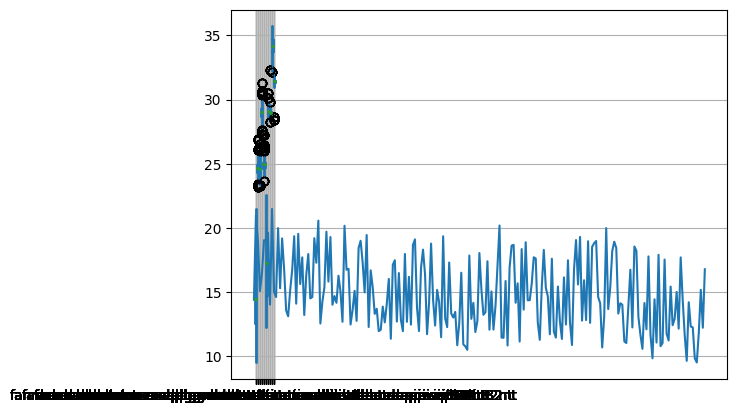

fannkuch-redux.exe.ipg.workstationone.all.intel-one-api.win32nt


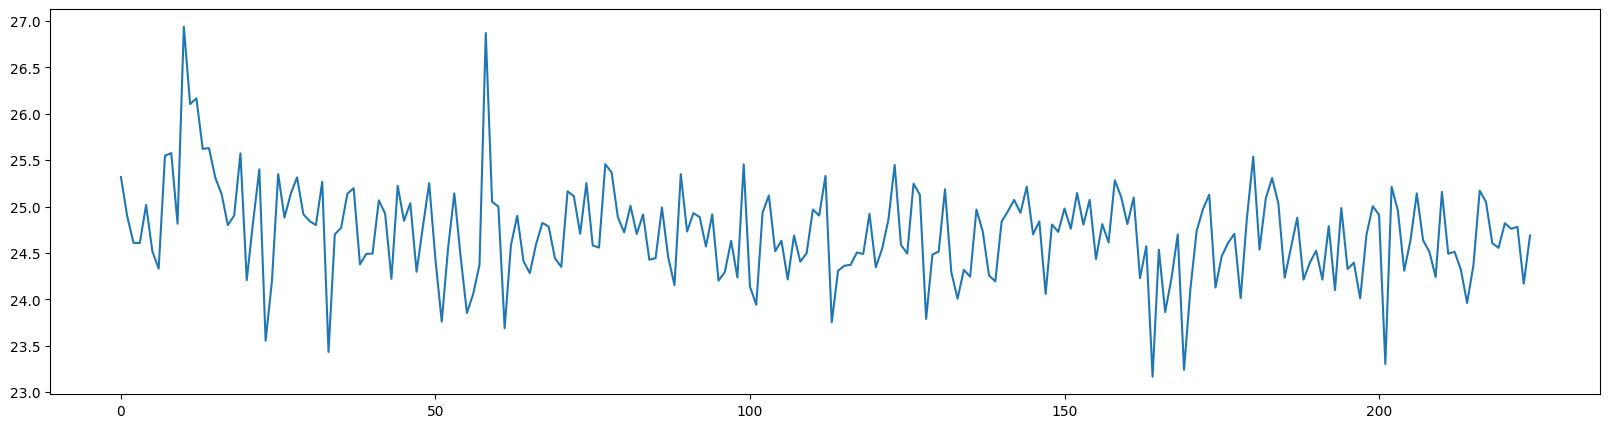

fannkuch-redux.exe.lhm.workstationone.all.intel-one-api.win32nt


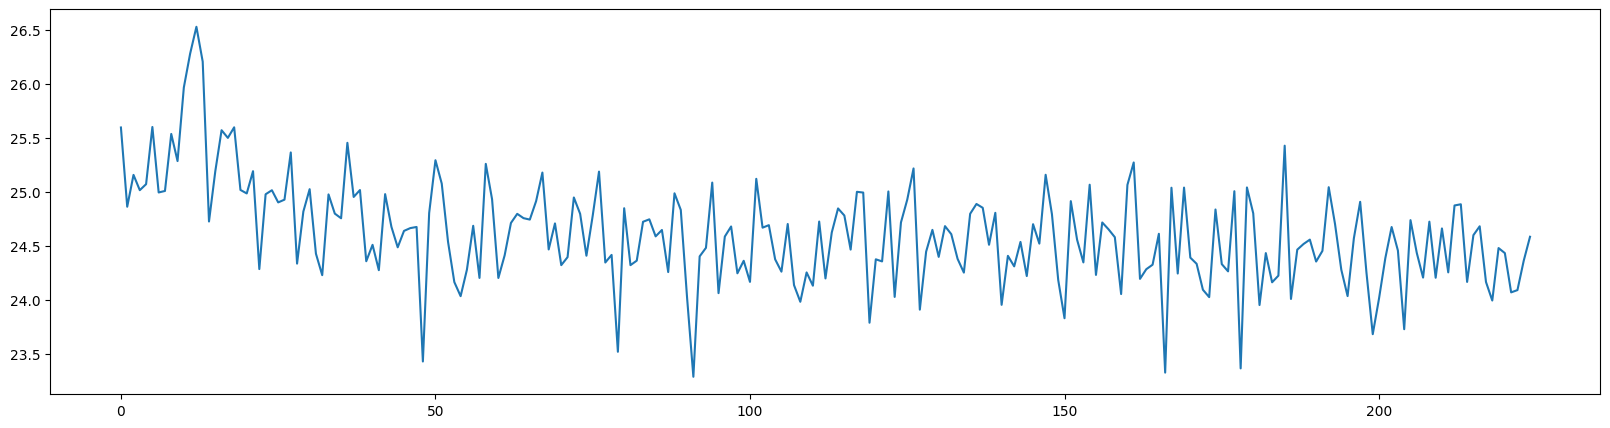

fannkuch-redux.exe.plug.workstationone.all.intel-one-api.win32nt


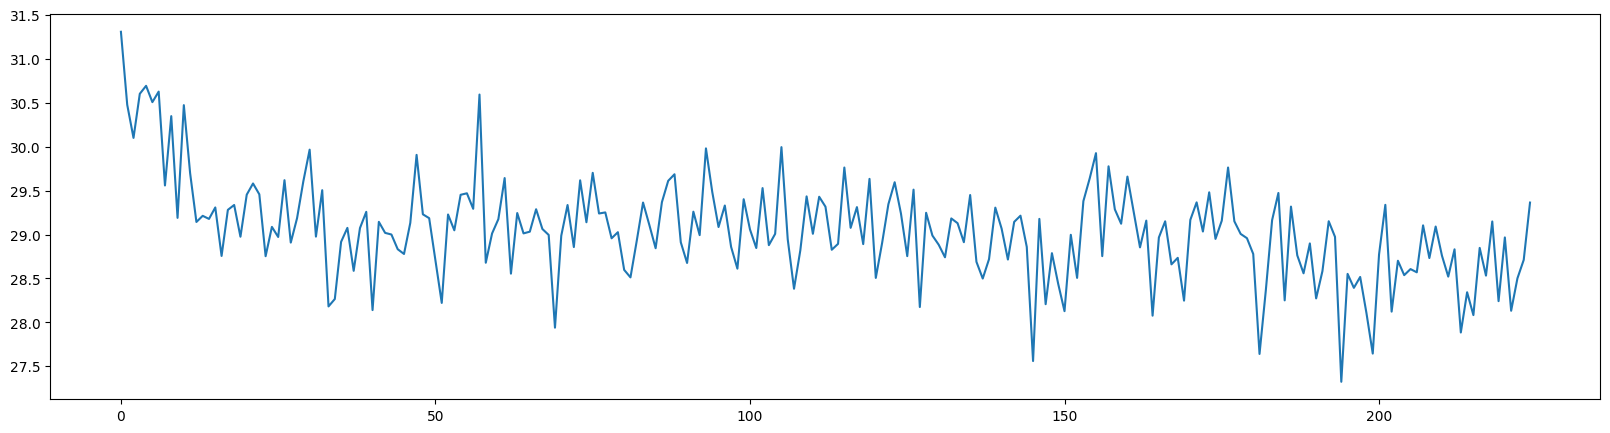

fannkuch-redux.exe.scaphandre.workstationone.all.intel-one-api.win32nt


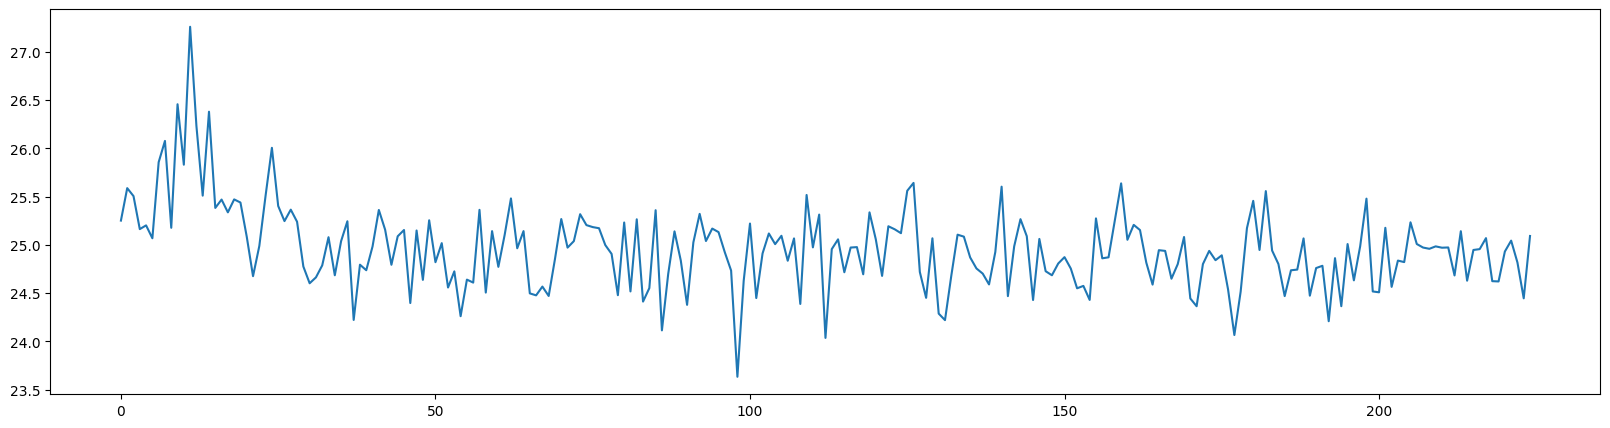

mandelbrot.exe.clamp.workstationone.all.intel-one-api.win32nt


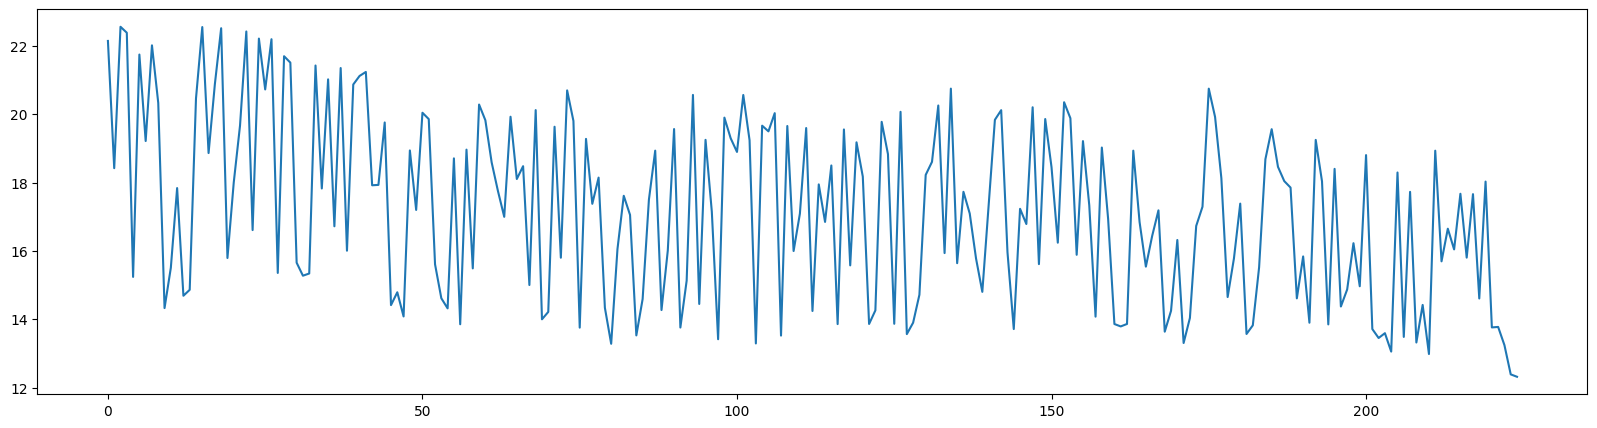

mandelbrot.exe.ipg.workstationone.all.intel-one-api.win32nt


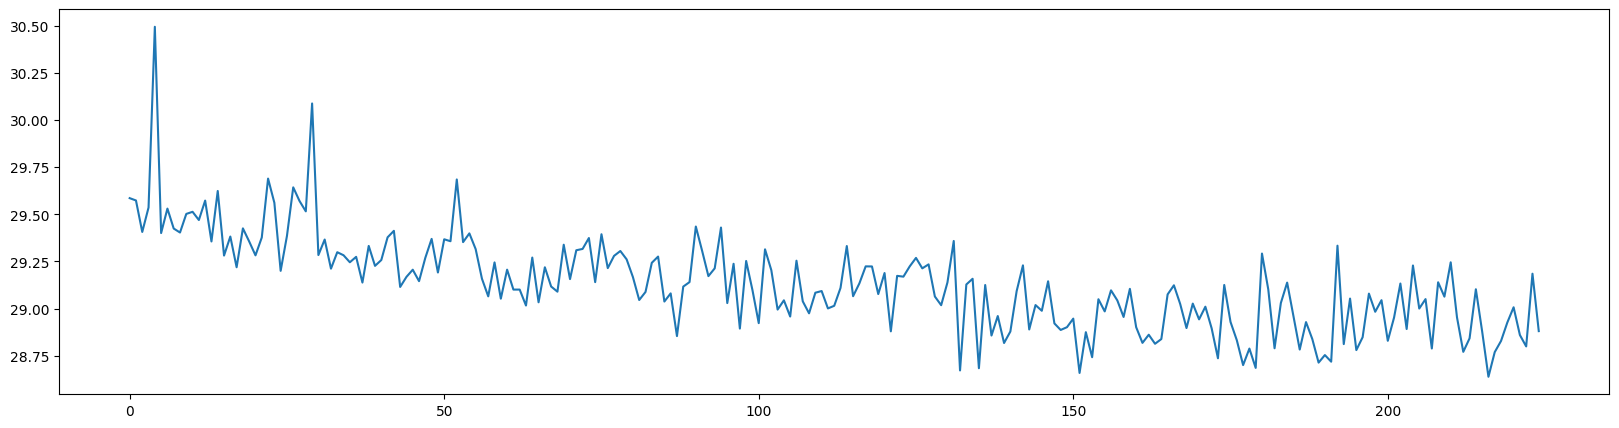

mandelbrot.exe.lhm.workstationone.all.intel-one-api.win32nt


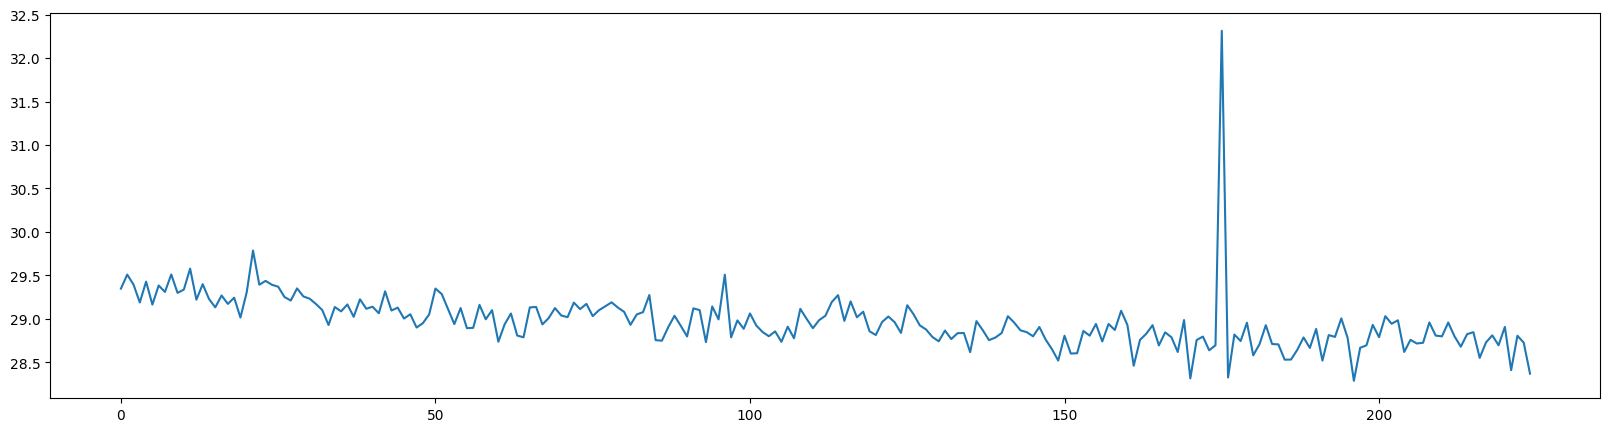

mandelbrot.exe.plug.workstationone.all.intel-one-api.win32nt


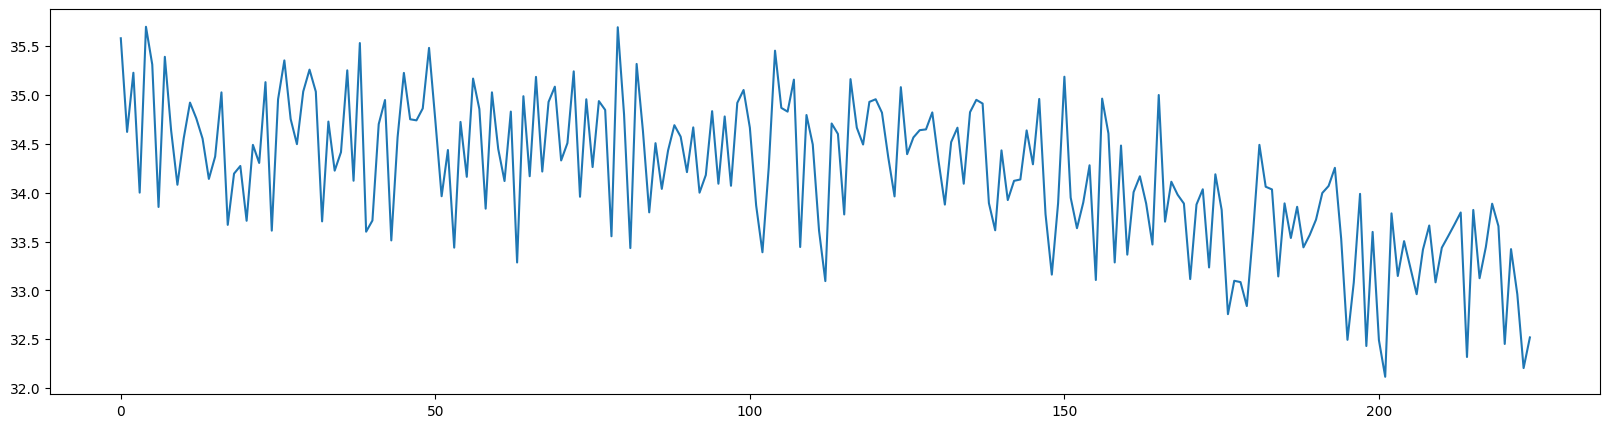

mandelbrot.exe.scaphandre.workstationone.all.intel-one-api.win32nt


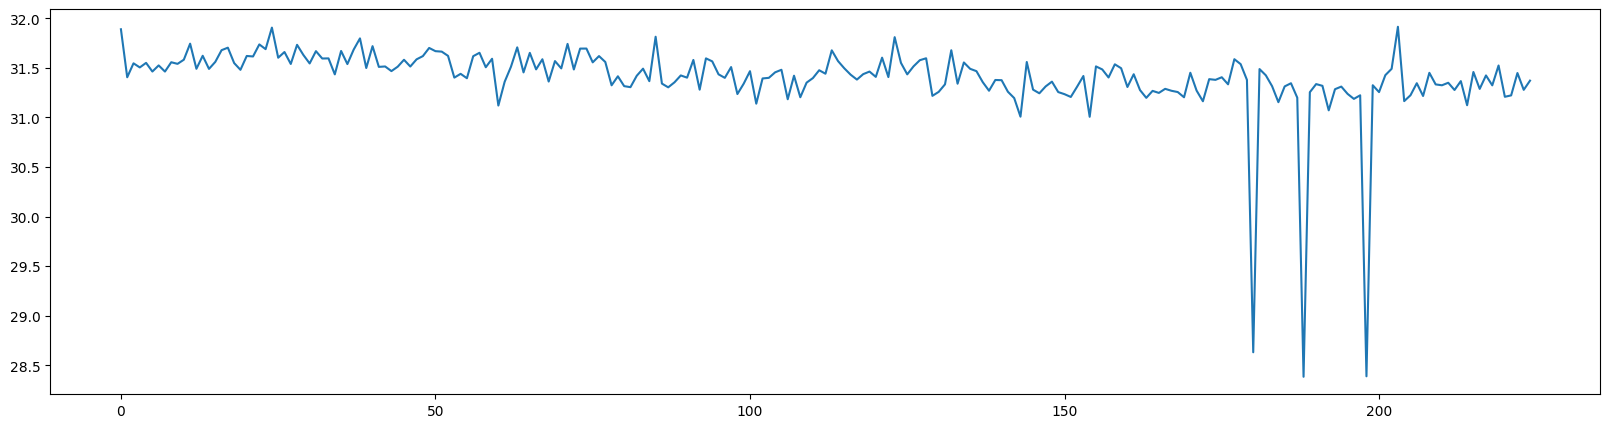

In [43]:

for column in used_df.columns:
    print(column)
    plot.rcParams["figure.figsize"] = (20,5)
    plot.plot(list(used_df[column]))
    plot.show()

